In [3]:
import pandas as pd 
import numpy as np

In [5]:
df=pd.read_csv("spam_dataset.csv")

In [6]:
df.head()

,message_content,is_spam
0,"Hello Lonnie,\n\nJust wanted to touch base reg...",0
1,"Congratulations, you've won a prize! Call us n...",1
2,You have been pre-approved for a credit card w...,1
3,"Limited time offer, act now! Only a few spots ...",1
4,Your loan has been approved! Transfer funds to...,1


In [7]:
x=df['message_content']
y=df['is_spam']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(stop_words="english")
x_train2=tfid.fit_transform(x_train)
x_test2=tfid.transform(x_test)
print(tfid.get_feature_names_out())

['01' '02' '03' ... 'zachary' 'zavala' 'zimmerman']


In [11]:
from sklearn.naive_bayes import MultinomialNB
model= MultinomialNB()

In [15]:
from sklearn.model_selection import cross_val_score
c_v = cross_val_score(estimator=model, X=x_train2, y=y_train, cv=5, scoring='f1')
g=pd.DataFrame(c_v)
g.mean()

model.fit(x_train2,y_train)

pred_y=model.predict(x_test2)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score

In [17]:
print(classification_report(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))
print(precision_score(y_test,pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       148

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

[[152   0]
 [  0 148]]
1.0


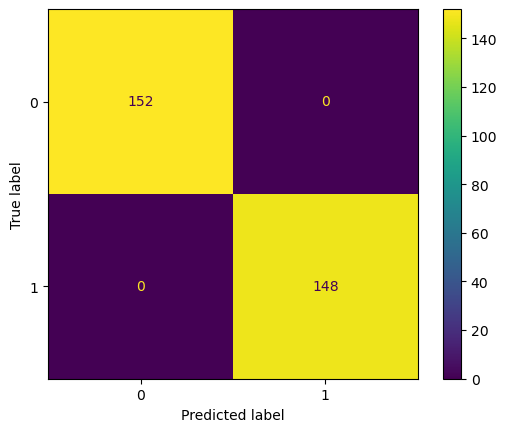

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, x_test2, y_test)

In [19]:
!pip install mlflow

In [20]:
import mlflow
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import logging


logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import mlflow
import mlflow.sklearn

mlflow.set_experiment("spam_nb_experiment")
with mlflow.start_run(run_name="nb_tfidf_v1"):
    params = {
        "tfidf_stop_words": "english",
        "tfidf_ngram_range": (1, 1),
        "tfidf_min_df": 1,
        "tfidf_max_df": 1.0,
        "nb_alpha": 1.0,
        "nb_fit_prior": True,
    }
    mlflow.log_params({
        "tfidf_stop_words": params["tfidf_stop_words"],
        "tfidf_ngram_range": str(params["tfidf_ngram_range"]),
        "tfidf_min_df": params["tfidf_min_df"],
        "tfidf_max_df": params["tfidf_max_df"],
        "nb_alpha": params["nb_alpha"],
        "nb_fit_prior": params["nb_fit_prior"],
    })

    pipe = Pipeline([
        ("tfidf", TfidfVectorizer(
            stop_words=params["tfidf_stop_words"],
            ngram_range=params["tfidf_ngram_range"],
            min_df=params["tfidf_min_df"],
            max_df=params["tfidf_max_df"]
        )),
        ("clf", MultinomialNB(
            alpha=params["nb_alpha"],
            fit_prior=params["nb_fit_prior"]
        )),
    ])

    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    mlflow.log_metrics({
        "accuracy_test": accuracy_score(y_test, y_pred),
        "precision_test": precision_score(y_test, y_pred, zero_division=0),
        "recall_test": recall_score(y_test, y_pred, zero_division=0),
        "f1_test": f1_score(y_test, y_pred, zero_division=0),
    })



In [ ]:
mlflow.sklearn.log_model(pipe, "model", input_example=["Get FREE coupons now!!!"])
print(f"default artifact location: '{mlflow.get_artifact_uri()}'")

2025/09/16 15:12:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/16 15:12:36 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: AttributeError("'int' object has no attribute 'lower'"). To see the full traceback, set the logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)`.


default artifact location: 'file:///Users/dlopez/Documents/Apps/MLFLOW/mlruns/150941196027457096/bc730618681541b394bf673e0061e87b/artifacts'
